The code below is the start of my capstone project

The data I am using is from the CNBC Website https://www.cnbc.com/2025/02/14/cnbcs-official-nba-team-valuations-2025.html and https://www.cnbc.com/2024/09/05/official-nfl-team-valuations-2024.html

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\kcoll\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


The code below moved my csv files in to actual dataframes for my code to read

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\kcoll\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv('CNBC NBA Franchise Valuation.csv')
print(df.head())

df1 = pd.read_csv('CNBC NFL Franchise Values.csv')
print(df1.head())

   Rank                   Team  Value Revenue EBITDA Debt as % of Value  \
0     1  Golden State Warriors  $9.4B   $781M  $155M                 9%   
1     2        New York Knicks  $7.5B   $578M  $178M                 4%   
2     3     Los Angeles Lakers    $7B   $528M  $191M                 3%   
3     4          Chicago Bulls  $5.8B   $402M  $118M                 3%   
4     5        Houston Rockets  $5.7B   $402M  $119M                 4%   

                                            Owner(s)  
0                             Joe Lacob, Peter Guber  
1                       Madison Square Garden Sports  
2  Jerry Buss family trust, Mark Walter, Todd Boehly  
3                                    Jerry Reinsdorf  
4                                    Tilman Fertitta  
   Rank                  Team   Value Revenue EBITDA Debt as % of value  \
0     1        Dallas Cowboys    $11B  $1.22B  $550M                 3%   
1     2      Los Angeles Rams     $8B   $825M  $243M                4

The code below removed columns that I was not wanting to report on or didn't add any value to my project

In [4]:
df.drop(columns=['EBITDA', 'Debt as % of Value', 'Owner(s)', 'Rank'], inplace=True)

print(df)

df1.drop(columns=['EBITDA', 'Debt as % of value', 'Owner(s)', 'Rank'], inplace=True)

print(df1)

                      Team   Value Revenue
0    Golden State Warriors   $9.4B   $781M
1          New York Knicks   $7.5B   $578M
2       Los Angeles Lakers     $7B   $528M
3            Chicago Bulls   $5.8B   $402M
4          Houston Rockets   $5.7B   $402M
5            Brooklyn Nets   $5.6B   $389M
6           Boston Celtics   $5.5B   $452M
7     Los Angeles Clippers   $5.4B   $351M
8               Miami Heat   $5.1B   $394M
9         Dallas Mavericks     $5B   $430M
10      Philadelphia 76ers   $4.9B   $394M
11            Phoenix Suns   $4.6B   $377M
12         Toronto Raptors   $4.5B   $349M
13        Sacramento Kings  $4.45B   $425M
14     Cleveland Cavaliers  $4.35B   $406M
15           Atlanta Hawks   $4.3B   $384M
16      Washington Wizards  $4.25B   $357M
17          Denver Nuggets   $4.2B   $386M
18         Milwaukee Bucks   $4.1B   $350M
19               Utah Jazz  $3.75B   $367M
20       San Antonio Spurs   $3.7B   $344M
21  Portland Trail Blazers  $3.65B   $339M
22         

The code below allowed me to display my combined dataframe in to more coherent manner for reading

In [5]:
import pandas as pd

df = pd.read_csv('CNBC NBA Franchise Valuation.csv')

df1 = df1 = pd.read_csv('CNBC NFL Franchise Values.csv')

df.drop(columns=['EBITDA', 'Debt as % of Value', 'Owner(s)', 'Rank'], inplace=True)

df1.drop(columns=['EBITDA', 'Debt as % of value', 'Owner(s)', 'Rank'], inplace=True)

Franchisevalues = pd.concat([df, df1],  ignore_index=True)
Franchisevalues = Franchisevalues.sort_values(by='Value', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(Franchisevalues)


                      Team   Value Revenue
0    Golden State Warriors   $9.4B   $781M
31        Los Angeles Rams     $8B   $825M
2       Los Angeles Lakers     $7B   $528M
38     Philadelphia Eagles     $7B   $669M
32    New England Patriots   $7.9B   $740M
34       Las Vegas Raiders   $7.8B   $780M
33         New York Giants  $7.85B   $723M
1          New York Knicks   $7.5B   $578M
35     San Francisco 49ers   $7.4B   $687M
36           New York Jets  $7.35B   $677M
37          Miami Dolphins   $7.1B   $673M
53    Jacksonville Jaguars     $6B   $567M
39           Chicago Bears   $6.4B   $590M
41       Green Bay Packers   $6.3B   $638M
40          Houston Texans  $6.35B   $640M
43          Denver Broncos   $6.2B   $613M
42   Washington Commanders  $6.25B   $602M
45         Atlanta Falcons   $6.1B   $625M
44        Seattle Seahawks  $6.11B   $600M
46     Pittsburgh Steelers  $6.08B   $596M
47      Kansas City Chiefs  $6.07B   $590M
48       Minnesota Vikings  $6.06B   $587M
49    Tampa

In [6]:
import matplotlib.pyplot as plt

The below code is used to convert the values in the "Value" column to numerical values.  I then proceeded to perform a couple of calculations to give the user an idea of what they are looking at from an overall perspective

In [7]:
def convert_to_numeric(value):
    value = value.replace('$', '').replace('B', '')
    return float(value) * 1e9
df['Value'] = df['Value'].apply(convert_to_numeric)

def convert_to_numeric(Revenue):
    
    Revenue = Revenue.replace('$', '')
    
    if 'B' in Revenue:
        Revenue = Revenue.replace('B', '')
        return float(Revenue) * 1e9  
    elif 'M' in Revenue:
        Revenue = Revenue.replace('M', '')
        return float(Revenue) * 1e6  
    else:
        return float(Revenue) 

df['Revenue'] = df['Revenue'].apply(convert_to_numeric)


median_Value = df['Value'].median()

print(f"The Median Value for these franchises is: {median_Value}")

median_Revenue = df['Revenue'].median()

print(f"The Median Revenue for these franchises is: {median_Revenue}")

mean_Value = df['Value'].mean()

print(f"The Mean Value for these franchises is: {mean_Value}")

mean_Revenue = df['Revenue'].mean()

print(f"The Mean Revenue for these franchises is: {mean_Revenue}")

Variance_value = df['Value'].var()

print(f"The Standard Derivation for these franchises is: {Variance_value}")

Variance_Revenue = df['Revenue'].var()

print(f"The Standard Derivation for the Revenue of these franchises is: {Variance_Revenue}")


The Median Value for these franchises is: 4325000000.0
The Median Revenue for these franchises is: 372000000.0
The Mean Value for these franchises is: 4658333333.333333
The Mean Revenue for these franchises is: 390333333.3333333
The Standard Derivation for these franchises is: 1.9989798850574717e+18
The Standard Derivation for the Revenue of these franchises is: 9357885057471262.0


This code is to create a bar chart to demonstrate how the Professional Franchises are compared by the Franchise's Value

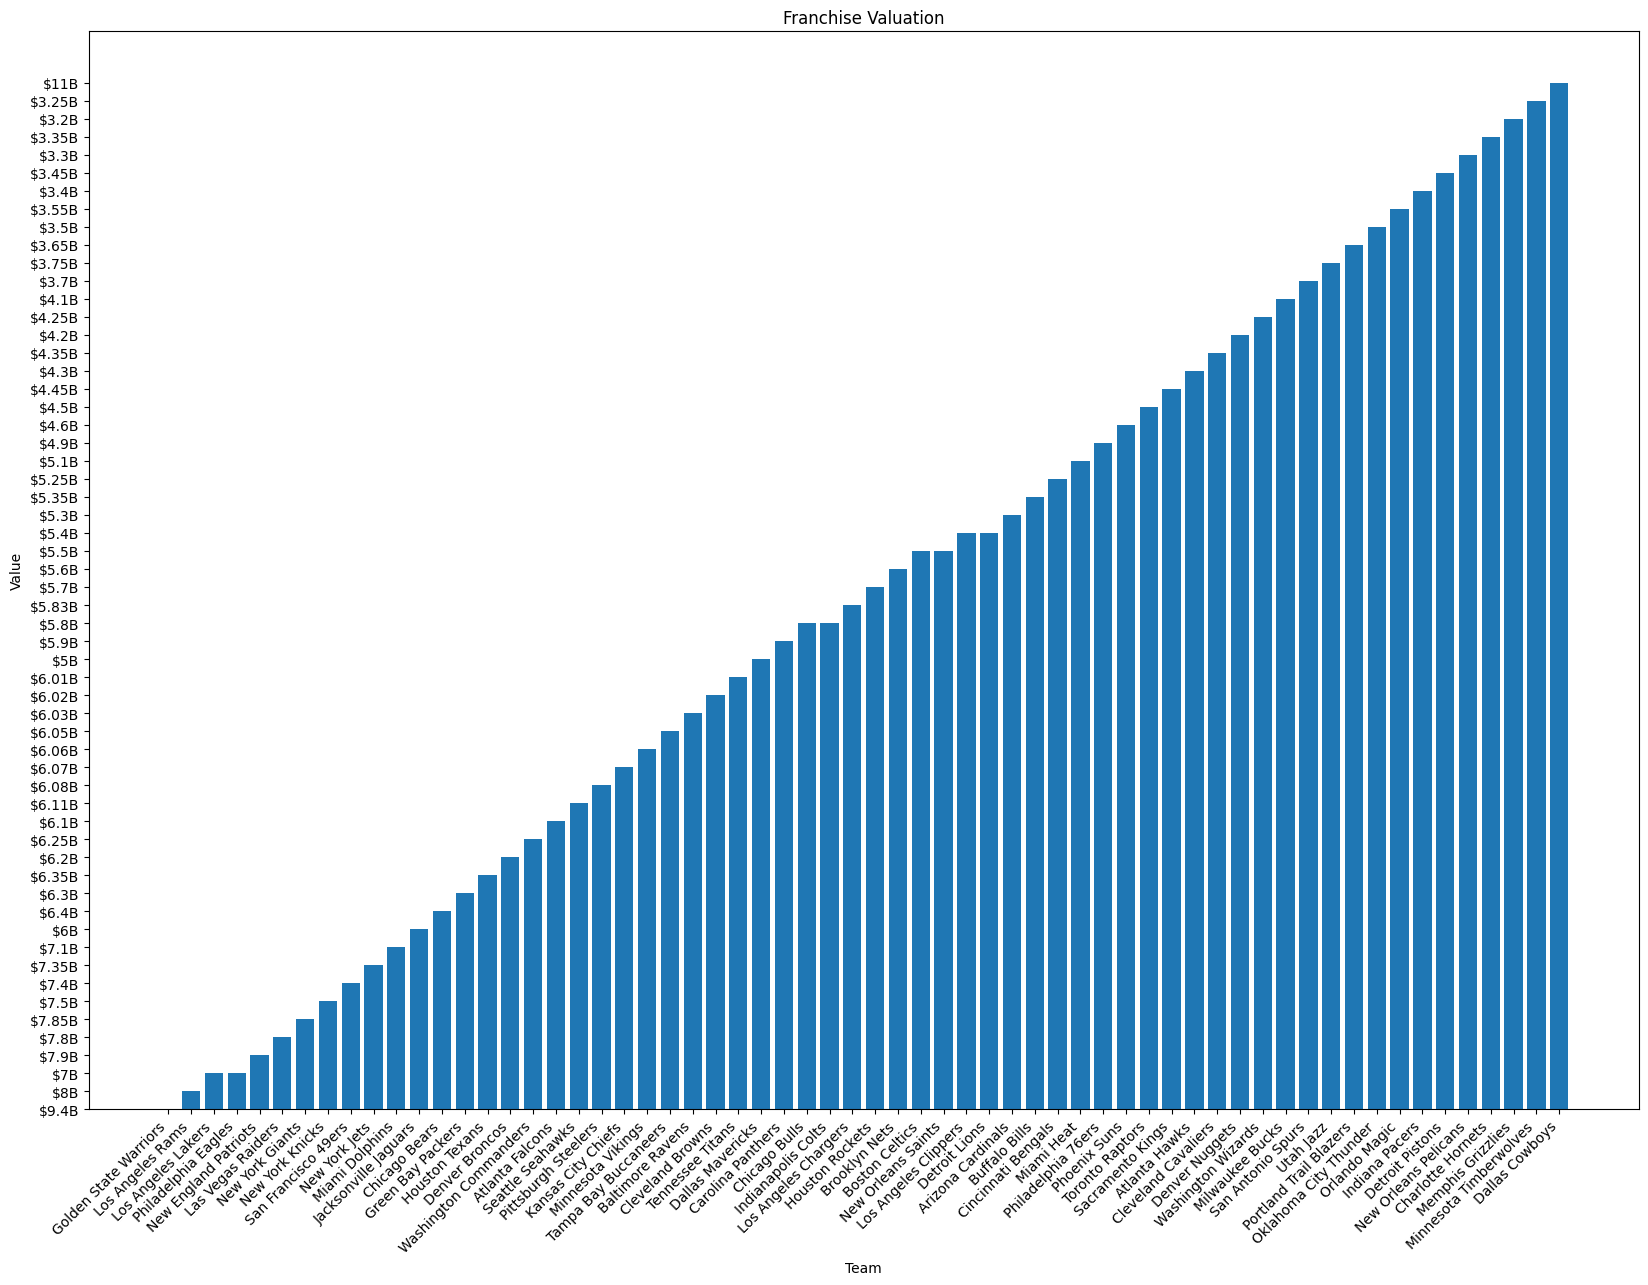

In [15]:
df3 = Franchisevalues
Value = df3['Value']
Team = df3['Team']
plt.figure(figsize=(20, 14))
plt.bar(Team, Value)
plt.title('Franchise Valuation')
plt.xlabel("Team")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right') 
plt.show()

This code creates a bar graph to show the comparison between the Franchises and their Revenue

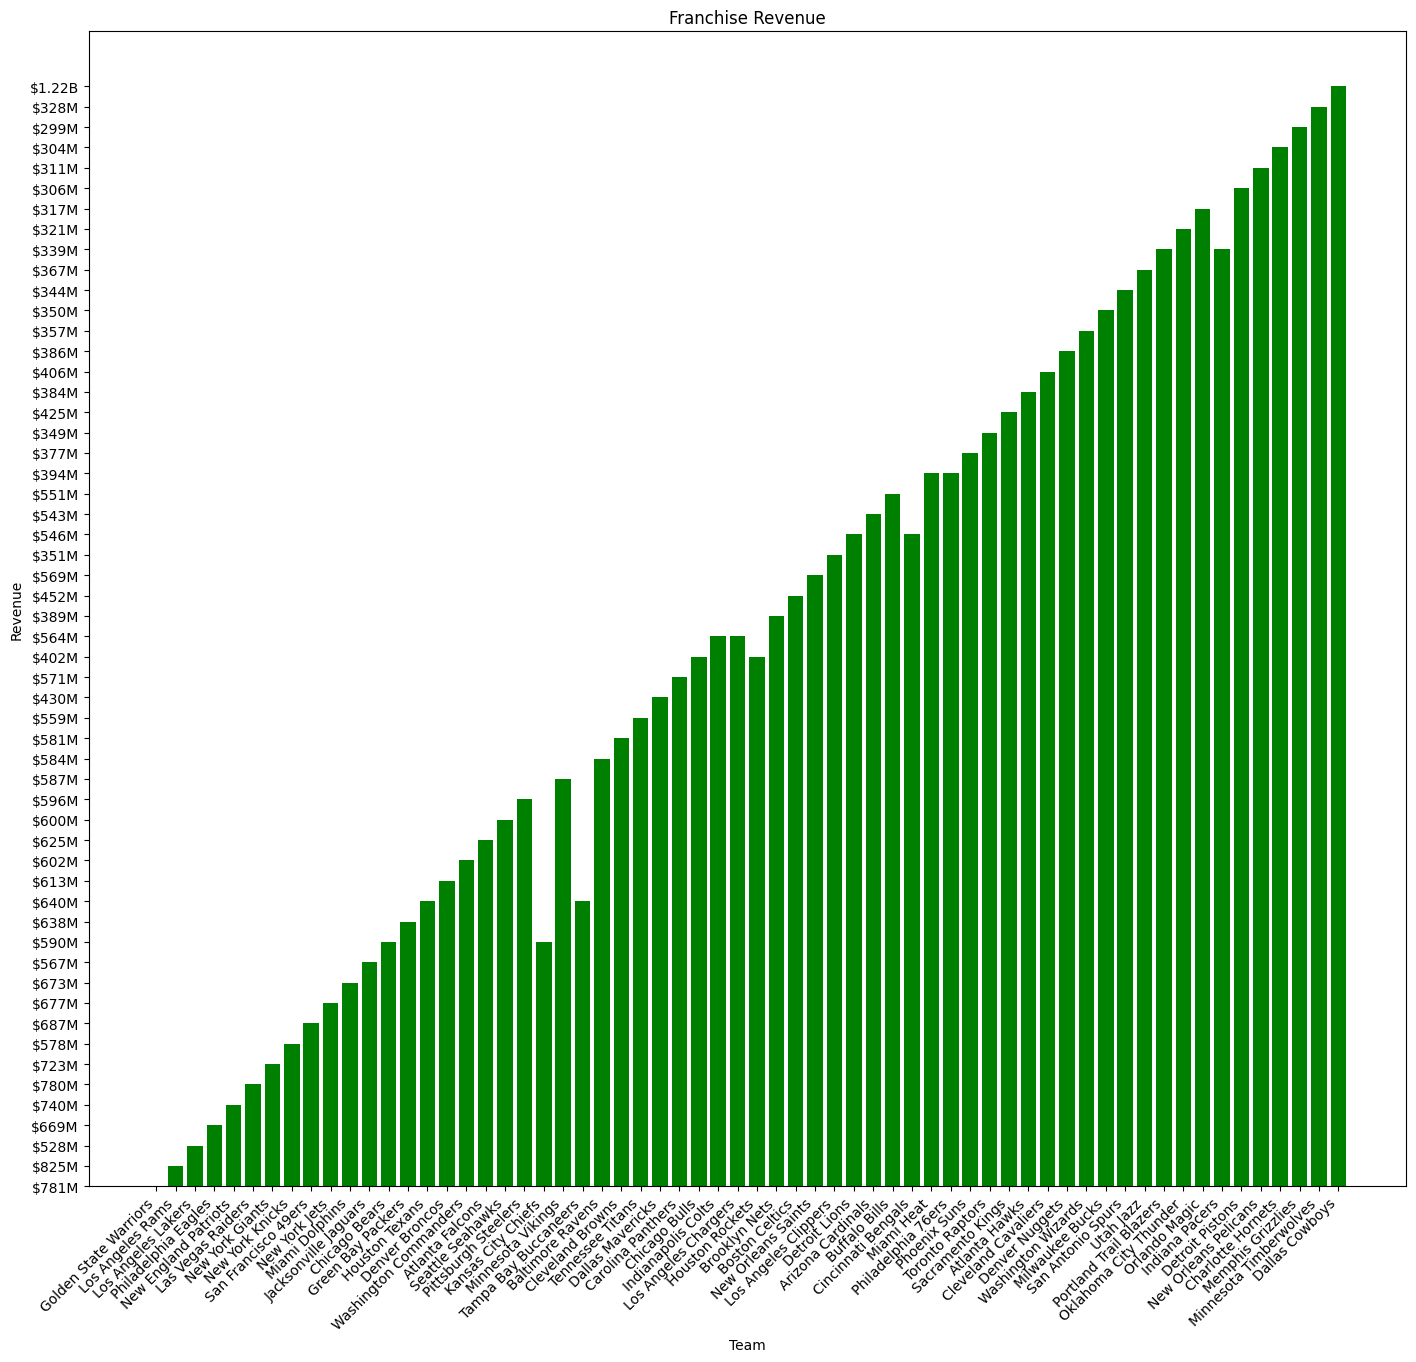

In [22]:
plt.figure(figsize=(17, 15))
df3 = Franchisevalues
Revenue = df3['Revenue']
Team = df3['Team']
plt.bar(Team, Revenue, color='green')
plt.title('Franchise Revenue')
plt.xlabel("Team")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right') 
plt.show()

This code demonstrates the Franchises and their values utilizing a scatter plot

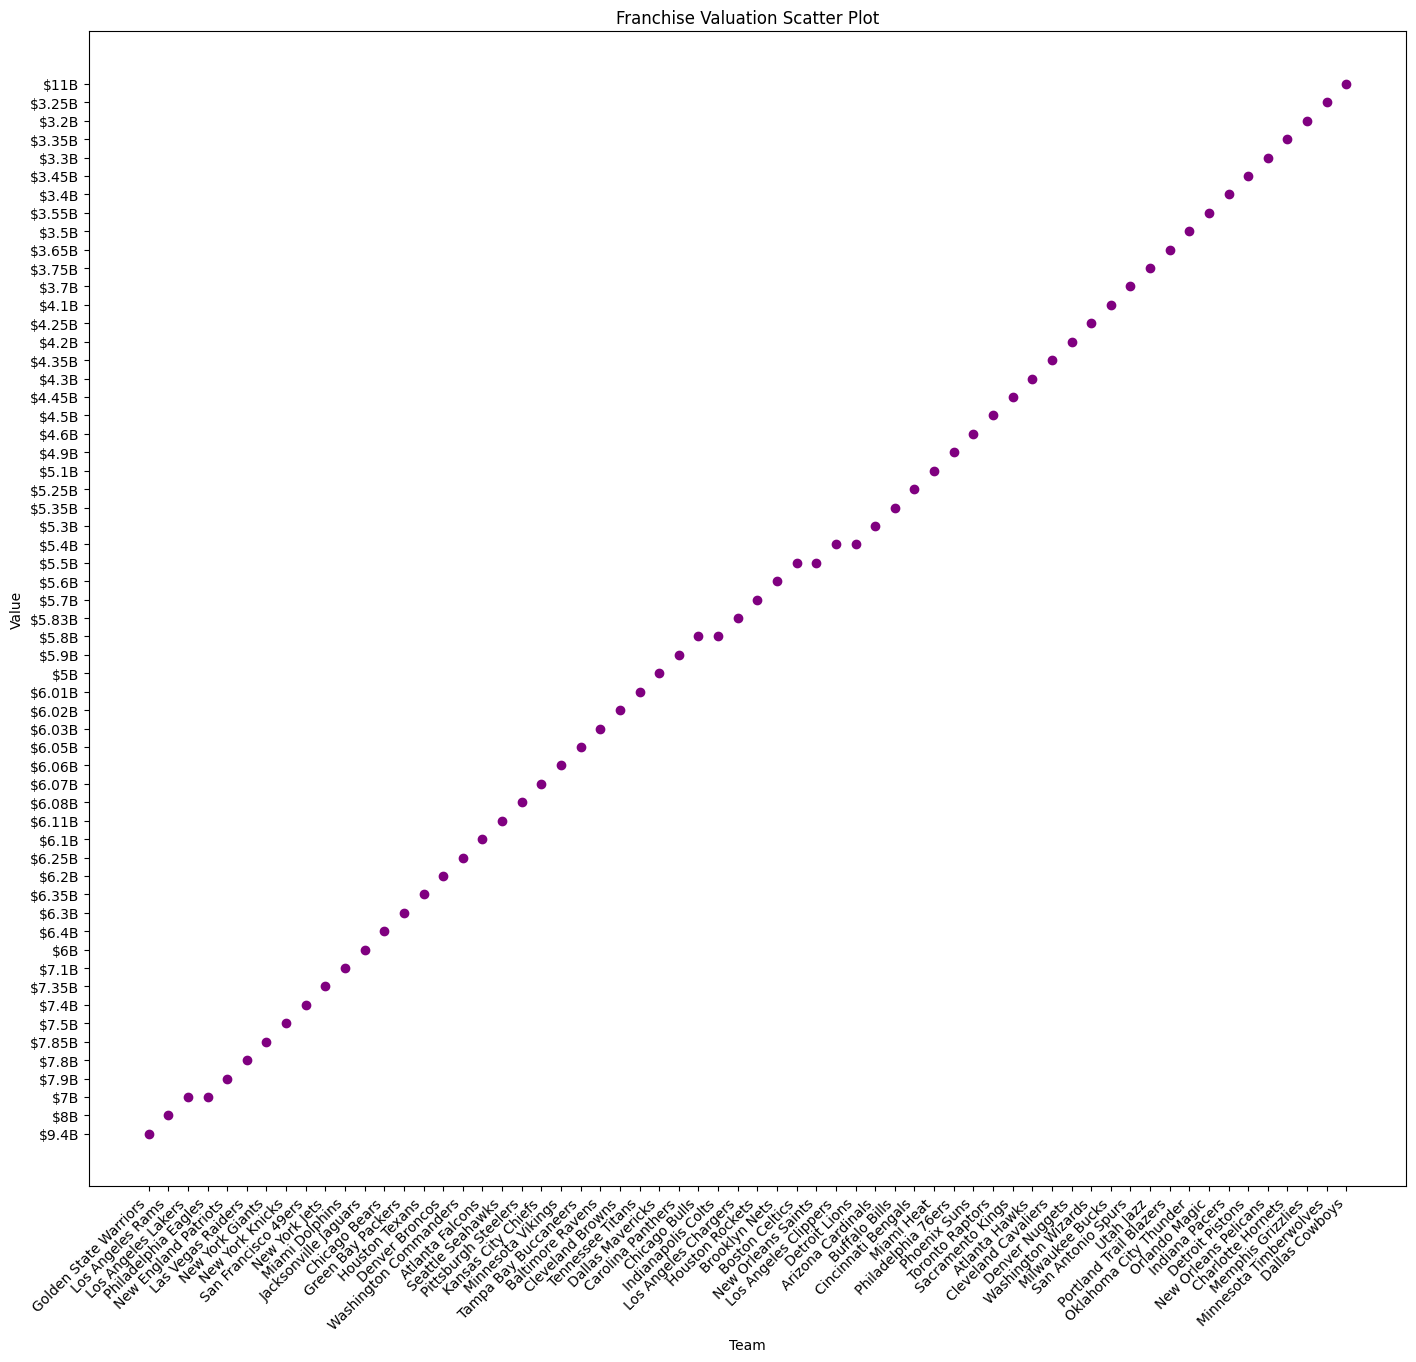

In [24]:
plt.figure(figsize=(17, 15))
df3 = Franchisevalues
Value = df3['Value']
Team = df3['Team']
plt.scatter(Team, Value, c='purple')
plt.title('Franchise Valuation Scatter Plot')
plt.xlabel("Team")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right') 
plt.show()

The purpose of the code above is to show which franchises between the NFL and NBA are the highest valued.   I also created code to show the Revenue that is generated by each franchise.  Once you look at these three graphs, you can see how Value and Revenue are related as well as which of the leagues have the highest valued and revenue generating franchises.  This can be redone on a yearly basis to see how the respective franchises grow in both of these areas.  Over time this would help determine which franchises are the most viable from a longevity perspective as well as whether the NFL or NBA have the most viable franchises.  The one caveat that would need to be considered to understand this data would be the interpeter's knowledge of which franchises were part of the NBA and which are part of the NFL.